In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
df = pd.read_pickle(filepath_or_buffer="../data/comparison_to_gd_20201120_151226.pkl")
df = df.drop(axis=1, labels=["losses_gd"])
df.head()

,d,m,n_rep,eps_A,number_evaluation_samples,number_hessians,repetition,error_A_FVD,MSE_net_FVD,Linf_net_FVD,error_A_gd,MSE_net_gd,Linf_net_gd
0,20,20,200,1,100000,1,0,4.497664,0.040425,0.741095,4.462948,0.037661,0.721143
1,20,20,200,1,100000,1,1,4.480960,0.040188,0.803699,4.471796,0.040450,0.801174
2,20,20,200,1,100000,1,2,4.456673,0.043039,0.739573,4.472195,0.043083,0.742945
3,20,20,200,1,100000,1,3,4.462657,0.039817,0.711758,4.470086,0.039359,0.723995
4,20,20,200,1,100000,1,4,4.426523,0.035350,0.753536,4.469635,0.035042,0.747953


In [4]:
data = df.groupby(by=["number_hessians"])[["error_A_FVD","MSE_net_FVD","Linf_net_FVD","error_A_gd","MSE_net_gd","Linf_net_gd"]].mean().reset_index()

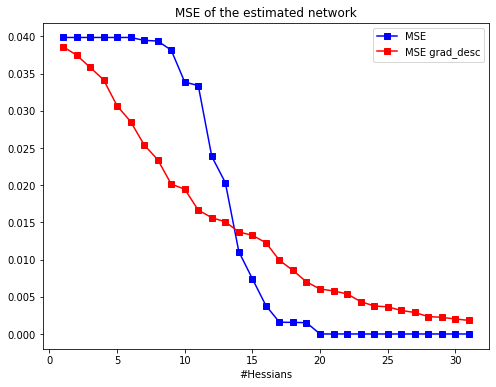

In [6]:
f, ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(data.number_hessians, data.MSE_net_FVD, "-sb", label="MSE")
ax.plot(data.number_hessians, data.MSE_net_gd, "-sr", label="MSE grad_desc")
ax.set_xlabel("#Hessians")
#ax.set_ylabel("Mean squared error")
ax.set_title("MSE of the estimated network")
ax.legend()
f.savefig("../plots/pltMSE.pdf",dpi=300)

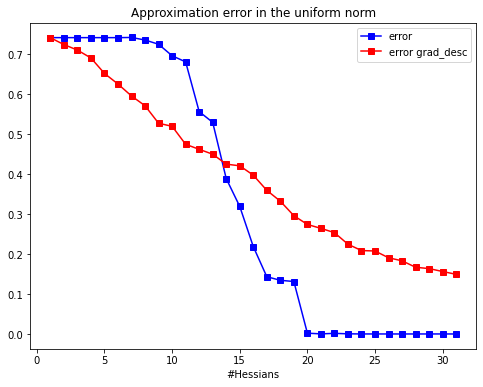

In [7]:
f, ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(data.number_hessians, data.Linf_net_FVD,  "-sb", label=r"error")
ax.plot(data.number_hessians, data.Linf_net_gd,  "-sr", label=r"error grad_desc")
ax.set_xlabel("#Hessians")
#ax.set_ylabel("Linf error")
ax.set_title("Approximation error in the uniform norm")
ax.legend()
f.savefig("../plots/pltLinferror.pdf",dpi=300)

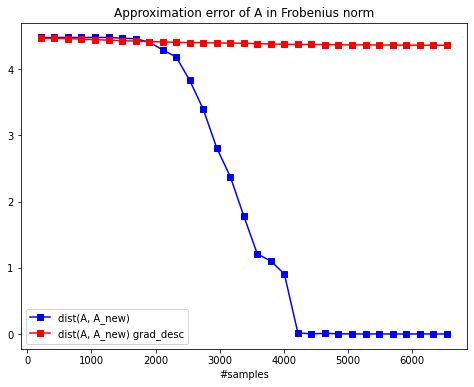

In [8]:
d = 20
f, ax = plt.subplots(1,1, figsize=(8,6))
samples = data.number_hessians * (d*(d+1)/2 +1)
ax.plot(samples, data.error_A_FVD,  "-sb", label=r"dist(A, A_new)")
ax.plot(samples, data.error_A_gd,  "-sr", label=r"dist(A, A_new) grad_desc")
ax.set_xlabel("#samples")
ax.set_title("Approximation error of A in Frobenius norm")
#ax.set_ylabel(r"dist$(A, \tilde{A})$")
ax.legend()
f.savefig("../plots/pltAsamples.pdf",dpi=300)

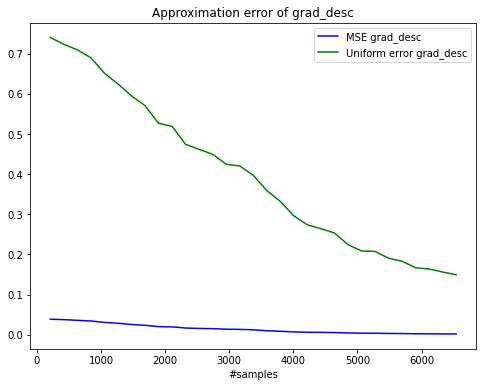

In [9]:
f, ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(samples, data.MSE_net_gd,  "-b", label=r"MSE grad_desc")
ax.plot(samples, data.Linf_net_gd,  "-g", label=r"Uniform error grad_desc")
ax.set_xlabel("#samples")
ax.set_title('Approximation error of grad_desc')
#ax.set_ylabel(r"dist$(A, \tilde{A})$")
ax.legend()
f.savefig("../plots/graddescLoss.pdf",dpi=300)